In [1]:
#!/usr/bin/env/ python3
# -*- coding: utf-8 -*-

In [2]:
## 1. 얼굴 Feature Vector 값 로드 
from __future__ import division
from __future__ import print_function
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pandas as pd 
import statsmodels.api as sm
import gensim, logging
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


plt.style.use(u'grayscale')
plt.style.available
%matplotlib inline 

plt.rc('font',family='AppleGothic')

In [3]:
# Show all dataframe
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [4]:
# Draw 2D Plot
def drawPlot(v, x, y, colors):
    v.plot(kind='scatter', x=x,y=y, figsize=(15,15), c=colors , s=200)
    
    for idx, pos in v.iterrows():
        plt.text(pos[x], pos[y], idx )

In [5]:
# Draw 3D Plot
def draw3DPlot(v, x, y, z, colors):
    fig = plt.figure(figsize=(15,15))
    threedee = fig.gca(projection='3d')
    threedee.scatter(v[x], v[y], v[z], c=colors , s=200, cmap=plt.cm.spring)
   
    for idx, pos in v.iterrows():
        threedee.text(pos[x], pos[y], pos[z], idx )

## 유사한 얼굴끼리 군집화 하기 
1. 얼굴 Feature Vector 값 로드 
2. 군집화 수 K결정(Rule of thumb) → 
$$ K \approx  \sqrt{\frac{N}{2}} $$
3. K-Means로 군집화
4. 군집화 결과 보기 
5. Centroid와 가장 유사한 얼굴 찾아 보기  : 중심 얼굴
6. K의 값을 변경해 가면 적절한 값을 찾기(Elbow Method) 

In [6]:
landmark_ds = pd.DataFrame.from_csv('produce101_only_face2vec.csv', encoding='utf-8')
landmark_ds

,eye_to_eye,eye_width,lip_to_chin,face_width,eyebrow_width,face_height,nose_width,mouth_width,lip_to_nose
박해영,0.51539,0.72163,0.19354,0.24544,0.05226,1.0,0.23529,0.29567,0.17263
황인선,0.36007,0.52048,0.25343,0.21154,0.03537,1.0,0.20701,0.27812,0.21604
김주나,0.46907,0.66437,0.26284,0.24110,0.04070,1.0,0.25062,0.28708,0.22619
응 씨 카이,0.51969,0.72081,0.25313,0.25206,0.04311,1.0,0.26526,0.33218,0.20838
강시라,0.47672,0.68154,0.20629,0.23118,0.04755,1.0,0.24233,0.28880,0.21622
김소희,0.49552,0.68948,0.22201,0.24525,0.03575,1.0,0.25532,0.34506,0.18946
허찬미,0.46825,0.66770,0.22319,0.22684,0.05503,1.0,0.24924,0.36111,0.20752
기희현,0.46498,0.66238,0.21613,0.24820,0.04798,1.0,0.27607,0.41631,0.16894
김다니,0.47099,0.66404,0.21390,0.22816,0.04735,1.0,0.26603,0.31039,0.17508
정채연,0.47949,0.67300,0.21776,0.22560,0.03703,1.0,0.26400,0.31527,0.18507


# Outliar removal

In [7]:
# 값이 없는 이해인 샘플 제거
# 알 수 없는 원인으로 독특한 값을 가지는 황인선 샘플 제거
landmark_ds = landmark_ds.drop([u'이해인'])

---
## 1. K-Means로 클러스터링하기

* 군집화 수 결정
$$ K \approx  \sqrt{\frac{N}{2}} $$


In [8]:
## 2. 군집화 수 K결정 sqrt(N/2)
K = math.ceil(np.sqrt(landmark_ds.count()[0]/2))
print ("K=", K)

K= 8


In [9]:
X = landmark_ds.values
cluster = KMeans(n_clusters = K)
cluster.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [10]:
cluster.labels_

array([7, 3, 1, 7, 1, 7, 6, 4, 6, 6, 1, 1, 7, 4, 6, 1, 6, 7, 1, 5, 0, 1, 4,
       5, 4, 4, 2, 6, 0, 2, 6, 7, 6, 1, 7, 5, 7, 5, 0, 0, 2, 1, 7, 1, 2, 2,
       4, 0, 4, 4, 2, 6, 7, 2, 6, 0, 4, 2, 4, 6, 7, 7, 1, 4, 1, 1, 4, 6, 1,
       7, 6, 4, 4, 7, 4, 4, 4, 0, 1, 2, 0, 4, 4, 6, 1, 1, 1, 1, 1, 4, 0, 7,
       7, 7, 1, 6, 7, 0, 1, 7], dtype=int32)

# Review
### 그룹 1(김세정, 강예빈, 전소연, 박시연, 추예진)은 웃는 얼굴사진으로 눈이 반달이 되는 특징을 보임
- 그룹 4는 상위권 등수로 웃는 사진이 투표자에게 호감을 사고 있을 가능성 존재

### 그룹 4(황인선)은 얼굴측면이 많이 찍혀 매우 독특한 사진으로 보임

In [11]:
## cluster 결과 
clustered = pd.DataFrame( [[a,b] for a,b in zip(landmark_ds.index, cluster.labels_)], \
                         columns=['name','group-id'], \
                         index=landmark_ds.index )
clustered.groupby(['group-id']).groups

{0: ['황수연', '주결경', '윤서형', '김소혜', '심채은', '이수민', '김설아', '임경하', '이채린', '허샘'],
 1: ['김주나',
  '강시라',
  '박가을',
  '강시원',
  '성혜민',
  '이윤서',
  '황아영',
  '강시현',
  '김형은',
  '이진희',
  '김다정',
  '함예지',
  '황리유',
  '최은빈',
  '남수진',
  '김자연',
  '김지성',
  '김홍은',
  '이수현88',
  '니와 시오리',
  '김윤지',
  '임효선'],
 2: ['임나영', '김청하', '김민지', '박하이', '임정민', '조시윤', '이수현', '최유정', '박민지'],
 3: ['황인선'],
 4: ['기희현',
  '김서경',
  '강경원',
  '김민경',
  '박시연',
  '김태하',
  '유연정',
  '윤채경',
  '정해림',
  '추예진',
  '편강윤',
  '마은진',
  '황세영',
  '김도희',
  '방준희',
  '안유미',
  '오한아름',
  '김수현',
  '김시현150',
  '신혜현'],
 5: ['전소연', '강예빈', '강미나', '김세정'],
 6: ['허찬미',
  '김다니',
  '정채연',
  '김시현',
  '박소연',
  '정은우',
  '오서정',
  '김연경',
  '유수아',
  '김도연',
  '전소미 ',
  '문현주',
  '이서정',
  '김우정',
  '이세흔'],
 7: ['박해영',
  '응 씨 카이',
  '김소희',
  '김민정',
  '권은빈',
  '안예슬',
  '한혜리',
  '김나영',
  '박세희',
  '아리요시 리사',
  '윤유담',
  '김하윤',
  '김보선',
  '김솔이',
  '최유빈',
  '캐서린 리',
  '한지연',
  '김미소',
  '서혜린']}

In [12]:
centers = cluster.cluster_centers_
print(centers)

[[ 0.495548    0.704355    0.246234    0.258056    0.051053    1.          0.283329
   0.389052    0.173125  ]
 [ 0.46783136  0.66951955  0.220915    0.236245    0.05083455  1.
   0.24649091  0.27920864  0.20494364]
 [ 0.50585667  0.71143333  0.20302556  0.24125556  0.05009667  1.
   0.28278667  0.41412     0.14237778]
 [ 0.36007     0.52048     0.25343     0.21154     0.03537     1.          0.20701
   0.27812     0.21604   ]
 [ 0.457981    0.6522685   0.2228455   0.24316     0.049838    1.
   0.2689955   0.395166    0.166899  ]
 [ 0.483475    0.6863075   0.2332875   0.2556875   0.0454975   1.
   0.2956875   0.465235    0.14293   ]
 [ 0.47386667  0.672604    0.213       0.23201067  0.05004867  1.          0.258152
   0.334766    0.177818  ]
 [ 0.50282579  0.71170895  0.22881526  0.24433474  0.04710053  1.
   0.26482421  0.33576579  0.19288789]]


In [13]:
landmark_ds.index

Index(['박해영', '황인선', '김주나', '응 씨 카이', '강시라', '김소희', '허찬미', '기희현', '김다니', '정채연',
       '박가을', '강시원', '김민정', '김서경', '김시현', '성혜민', '박소연', '권은빈', '이윤서', '전소연',
       '황수연', '황아영', '강경원', '강예빈', '김민경', '박시연', '임나영', '정은우', '주결경', '김청하',
       '오서정', '안예슬', '김연경', '강시현', '한혜리', '강미나', '김나영', '김세정', '윤서형', '김소혜',
       '김민지', '김형은', '박세희', '이진희', '박하이', '임정민', '김태하', '심채은', '유연정', '윤채경',
       '조시윤', '유수아', '아리요시 리사', '이수현', '김도연', '이수민', '정해림', '최유정', '추예진',
       '전소미 ', '윤유담', '김하윤', '김다정', '편강윤', '함예지', '황리유', '마은진', '문현주', '최은빈',
       '김보선', '이서정', '황세영', '김도희', '김솔이', '방준희', '안유미', '오한아름', '김설아', '남수진',
       '박민지', '임경하', '김수현', '김시현150', '김우정', '김자연', '김지성', '김홍은', '이수현88',
       '니와 시오리', '신혜현', '이채린', '최유빈', '캐서린 리', '한지연', '김윤지', '이세흔', '김미소',
       '허샘', '임효선', '서혜린'],
      dtype='object')

In [14]:
# 센터의 row index로 뽑아보려 했으나 센터가 샘플중에 없다
# 그리고 row index 뽑는 법좀 개선해보자
# pandas for data analysis 143p

# dd= [] 
# for center in centers :

# #     print(center)
#     for row_value in landmark_ds.values:
#         dd.append(all(center==row_value))

# print(landmark_ds.index[dd])

## 군집화의 적정성 평가  ( 주관적 평가)
* 동일한 사람이 동일한 클러스터 많이 묶일수록 군집화가 적정하다. 
* 클러스터의 평균 수가 작을 수록 군집화가 적절하다고 판단

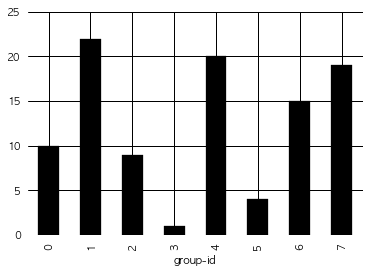

In [15]:
clustered['name_only'] = clustered['name'].apply(lambda x: x.split(':')[0])
clustered.groupby('group-id').name_only.nunique().plot(kind='bar')

In [16]:
print(clustered.groupby('group-id').name_only.nunique().mean())

12.5


## 얼굴 특징별로(눈,코&입) Scatter Plot 에 그려보자

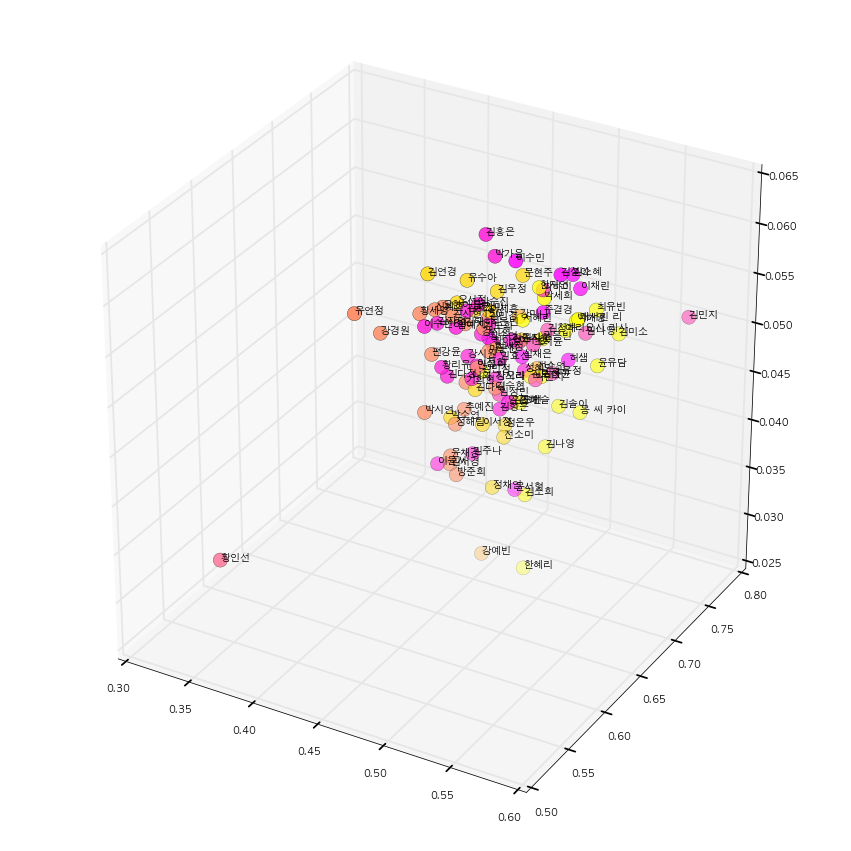

In [17]:
# 눈 주변 특징만으로 클러스터링
draw3DPlot(landmark_ds, 'eye_to_eye', 'eye_width', 'eyebrow_width', clustered['group-id'])

# Review
- 황인선양의 사진의 눈 비율이 독특하다
- 강예빈, 한혜리양 사진은 얼굴대비 눈의 비율이 크다(혹은 그렇게 보이게 사진에 찍혔다)

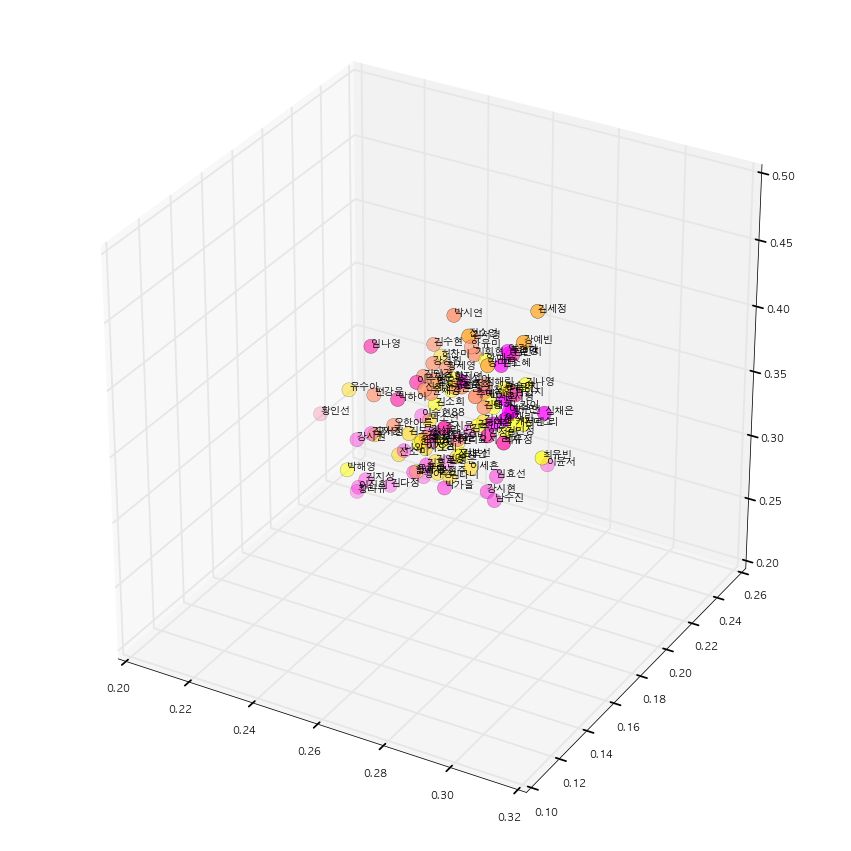

In [18]:
# 코, 입 특징만으로 클러스터링
draw3DPlot(landmark_ds, 'nose_width', 'lip_to_nose', 'mouth_width', clustered['group-id'])

# Review
- 코와 입으로는 클러스터링이 의미가 없다

---
## 2. Hierarchical Clustering으로 군집화 하기 

In [19]:
X = landmark_ds.values
hi_cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage='ward')
hi_cluster.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=8, n_components=None,
            pooling_func=<function mean at 0x10a3b8d90>)

In [20]:
## cluster 결과 
hi_cluster_df = pd.DataFrame( [[a,b] for a,b in zip(landmark_ds.index, hi_cluster.labels_)], \
                         columns=['name','group-id'], \
                         index=landmark_ds.index )
hi_cluster_df.groupby(['group-id']).groups

print_full(hi_cluster_df.sort_values(['group-id']))

            name  group-id
김세정          김세정         0
임정민          임정민         0
강예빈          강예빈         0
박하이          박하이         0
임나영          임나영         0
전소연          전소연         0
조시윤          조시윤         0
이수현          이수현         0
강미나          강미나         0
최유정          최유정         0
김청하          김청하         0
박민지          박민지         0
이수민          이수민         1
마은진          마은진         1
한혜리          한혜리         1
김민경          김민경         1
안유미          안유미         1
오한아름        오한아름         1
임경하          임경하         1
김수현          김수현         1
김민정          김민정         1
허찬미          허찬미         1
유수아          유수아         1
김나영          김나영         2
허샘            허샘         2
윤서형          윤서형         2
김소혜          김소혜         2
김민지          김민지         2
캐서린 리      캐서린 리         2
주결경          주결경         2
이채린          이채린         2
심채은          심채은         2
황수연          황수연         2
김설아          김설아         2
유연정          유연정         3
김태하          김태하         3
추

# Review
## K-means VS Hierarchical Clustering 은 비슷한 결과를 보여주었다

In [21]:
clustered.to_csv("produce101_face_clustered.csv", encoding='utf-8')